# Security Bugs 

In [5]:
import pandas as pd
full_df=pd.read_csv('CassandraSecirityRelated Bugs.csv')
full_df.head(10)

,key,text_wo_stopfreq,text_stemmed,NEWcolumn
0,CASSANDRA-16028,code java cassandra pylib cqlshlib test runcql...,cod jav cassandr pylib cqlshlib test runcqlsh ...,SBR
1,CASSANDRA-16020,cassandra cassandra detected unit test coverag...,cassandr cassandr detect unit test cov tool mi...,SBR
2,CASSANDRA-16004,https app circleci com pipelines github dcapwe...,https ap circlec com pipelin github dcapwel ca...,SBR
3,CASSANDRA-16003,jvm output stderr environments show flags pick...,jvm output stderr environ show flag pick hap t...,SBR
4,CASSANDRA-16002,fileutils check see access classes specificall...,fileutil check see access class spec set org a...,SBR
5,CASSANDRA-15999,hi cassandra seems released debian package rep...,hi cassandr seem releas deb pack reposit selec...,SBR
6,CASSANDRA-15982,two typos howtocommit rst amend amend atomic a...,two typo howtocommit rst amend amend atom atom...,NSBR
7,CASSANDRA-15981,race condition bug cms class unloading cause j...,rac condit bug cms class unload caus jvm crash...,SBR
8,CASSANDRA-15980,logging inbound ssl connections take place pro...,log inbound ssl connect tak plac protocol nego...,SBR
9,CASSANDRA-15973,earlier custom versions could extra digit coul...,ear custom vert could extr digit could multipl...,SBR


In [6]:
dfinals=full_df.drop(['text_wo_stopfreq'],axis=1)
dfinals.head(1)

,key,text_stemmed,NEWcolumn
0,CASSANDRA-16028,cod jav cassandr pylib cqlshlib test runcqlsh ...,SBR


In [7]:
dfinals.head(1)

,key,text_stemmed,NEWcolumn
0,CASSANDRA-16028,cod jav cassandr pylib cqlshlib test runcqlsh ...,SBR


In [9]:
dfinals['NEWcolumn'].value_counts()

SBR     4366
NSBR    1319
Name: NEWcolumn, dtype: int64

In [10]:
#df_nsbr=df[df.NEWcolumn=='NSBR']

In [11]:
dfinals['NEWcolumn']=dfinals['NEWcolumn'].apply(lambda x: 1 if x=='SBR' else 0)

In [12]:
dfinals.head(1)

,key,text_stemmed,NEWcolumn
0,CASSANDRA-16028,cod jav cassandr pylib cqlshlib test runcqlsh ...,1


# SMOTE

In [13]:
dfinals.describe()

,NEWcolumn
count,5685.000000
mean,0.767986
std,0.422155
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [14]:
x_train=dfinals['text_stemmed']
from sklearn.feature_extraction.text import TfidfVectorizer

list=x_train.tolist()
tfIdfVectorizer=TfidfVectorizer(input=list,lowercase=True,stop_words='english')
tfIdfVectorizer

TfidfVectorizer(input=['cod jav cassandr pylib cqlshlib test runcqlsh py lin '
                       'readuntil isinst patterntyp attributeer mod attribut '
                       'patterntyp cod intern mod attribut chang remov python '
                       'https github com python cpython pul fil diff dae f fca '
                       'ca f r l break manifest ci test us jenkin host system '
                       'python triv patch ad short cqlsh test brok python',
                       'cassandr cassandr detect unit test cov tool minim unit '
                       't...
                       'apach cassandr jar jav lang thread run thread jav na '
                       'cod nullpointerexceiv select json stat uuid field '
                       'contain empty string',
                       'jav testmultiplerepair repairtest '
                       'incrementalrepairtest testincrepair fail loc circlec '
                       'https ap circlec com pipelin github ekaterinadimit

In [15]:
X=tfIdfVectorizer.fit_transform(list)
y = dfinals['NEWcolumn']
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3979, 19594)
(1706, 19594)
(3979,)
(1706,)


# Without SMOTE

# DECISION TREE CLASSIFIER

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
from statistics import mean


model = DecisionTreeClassifier()
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, x_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
model.fit(x_train,y_train)
pred = model.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

actual=y_test.tolist()
predicted=pred.tolist()
results=confusion_matrix(actual,predicted)
print('DT')
print(results)
print('confusion matrix')

print("classifier accuracy{:.2f}%".format(model.score(x_test,y_test)*100))

score_2=f1_score(actual,predicted,average='binary')
print("F-measure{:.2f}%",score_2)

print("AUC{:.2f}%",mean(scores))






0.8083235638921453
              precision    recall  f1-score   support

           0       0.58      0.65      0.61       399
           1       0.89      0.86      0.87      1307

    accuracy                           0.81      1706
   macro avg       0.74      0.75      0.74      1706
weighted avg       0.82      0.81      0.81      1706

DT
[[ 261  138]
 [ 189 1118]]
confusion matrix
classifier accuracy80.83%
F-measure{:.2f}% 0.8724151385095592
AUC{:.2f}% 0.7405096222380613


# RANDOM FOREST CLASSIFIER

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

# Train
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)
preds = model.predict(x_test)


print(accuracy_score(y_test,preds))
print(classification_report(y_test,preds))

actual=y_test.tolist()
predicted=preds.tolist()
results=confusion_matrix(actual,predicted)
print(results)
print('confusion matrix')

print("classifier accuracy{:.2f}%".format(model.score(x_test,y_test)*100))

score_2=f1_score(actual,predicted,average='binary')
print("F-measure{:.2f}%",score_2)

print("AUC{:.2f}%",mean(scores))


# Evaluate
print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
#plt.figure(figsize=(8, 6))
#plt.title('Confusion Matrix (without SMOTE)', size=16)
#sns.heatmap(cm, annot=True, cmap='Blues');

0.8147713950762017
              precision    recall  f1-score   support

           0       0.71      0.36      0.47       399
           1       0.83      0.95      0.89      1307

    accuracy                           0.81      1706
   macro avg       0.77      0.66      0.68      1706
weighted avg       0.80      0.81      0.79      1706

[[ 142  257]
 [  59 1248]]
confusion matrix
classifier accuracy81.48%
F-measure{:.2f}% 0.887624466571835
AUC{:.2f}% 0.7405096222380613
Accuracy = 0.81
Recall = 0.95



# Logistic Regression
(without smote)

In [18]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
# logistic regression object
lr = LogisticRegression()

# train the model on train set
lr.fit(x_train, y_train.ravel())

pred = lr.predict(x_test)


scores = cross_val_score(model, x_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

actual=y_test.tolist()
predicted=pred.tolist()
results=confusion_matrix(actual,predicted)
print(results)
print('confusion matrix')

print("classifier accuracy{:.2f}%".format(lr.score(x_test,y_test)*100))

score_2=f1_score(actual,predicted,average='binary')
print("F-measure{:.2f}%",score_2)

print("AUC{:.2f}%",mean(scores))




0.7901524032825322
              precision    recall  f1-score   support

           0       0.72      0.17      0.27       399
           1       0.79      0.98      0.88      1307

    accuracy                           0.79      1706
   macro avg       0.76      0.57      0.57      1706
weighted avg       0.78      0.79      0.74      1706

[[  67  332]
 [  26 1281]]
confusion matrix
classifier accuracy79.02%
F-measure{:.2f}% 0.8773972602739727
AUC{:.2f}% 0.8557548445053162


# Adaboost

In [19]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics


# Train
model = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
model.fit(x_train, y_train)
preds = model.predict(x_test)


print(accuracy_score(y_test,preds))
print(classification_report(y_test,preds))

actual=y_test.tolist()
predicted=preds.tolist()
results=confusion_matrix(actual,predicted)
print(results)
print('confusion matrix')

print("classifier accuracy{:.2f}%".format(model.score(x_test,y_test)*100))

score_2=f1_score(actual,predicted,average='binary')
print("F-measure{:.2f}%",score_2)

print("AUC{:.2f}%",mean(scores))


# Evaluate
print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
#plt.figure(figsize=(8, 6))
#plt.title('Confusion Matrix (without SMOTE)', size=16)
#sns.heatmap(cm, annot=True, cmap='Blues');

0.8229777256740914
              precision    recall  f1-score   support

           0       0.60      0.71      0.65       399
           1       0.91      0.86      0.88      1307

    accuracy                           0.82      1706
   macro avg       0.75      0.78      0.77      1706
weighted avg       0.84      0.82      0.83      1706

[[ 282  117]
 [ 185 1122]]
confusion matrix
classifier accuracy82.30%
F-measure{:.2f}% 0.8813825608798115
AUC{:.2f}% 0.8557548445053162
Accuracy = 0.82
Recall = 0.86



# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression(solver='liblinear', penalty='l1')
lr=lr.fit(x_train, y_train)
preds = lr.predict(x_test)


print(accuracy_score(y_test,preds))
print(classification_report(y_test,preds))

actual=y_test.tolist()
predicted=preds.tolist()
results=confusion_matrix(actual,predicted)
print(results)
print('confusion matrix')

print("classifier accuracy{:.2f}%".format(model.score(x_test,y_test)*100))

score_2=f1_score(actual,predicted,average='binary')
print("F-measure{:.2f}%",score_2)

print("AUC{:.2f}%",mean(scores))


# Evaluate
print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
#plt.figure(figsize=(8, 6))
#plt.title('Confusion Matrix (without SMOTE)', size=16)
#sns.heatmap(cm, annot=True, cmap='Blues');

0.8007033997655334
              precision    recall  f1-score   support

           0       0.65      0.32      0.43       399
           1       0.82      0.95      0.88      1307

    accuracy                           0.80      1706
   macro avg       0.74      0.63      0.65      1706
weighted avg       0.78      0.80      0.77      1706

[[ 128  271]
 [  69 1238]]
confusion matrix
classifier accuracy82.30%
F-measure{:.2f}% 0.8792613636363636
AUC{:.2f}% 0.8557548445053162
Accuracy = 0.80
Recall = 0.95



In [21]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model=model.fit(x_train, y_train)
preds = model.predict(x_test)


print(accuracy_score(y_test,preds))
print(classification_report(y_test,preds))

actual=y_test.tolist()
predicted=preds.tolist()
results=confusion_matrix(actual,predicted)
print(results)
print('confusion matrix')

print("classifier accuracy{:.2f}%".format(model.score(x_test,y_test)*100))

score_2=f1_score(actual,predicted,average='binary')
print("F-measure{:.2f}%",score_2)

print("AUC{:.2f}%",mean(scores))


# Evaluate
print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
#plt.figure(figsize=(8, 6))
#plt.title('Confusion Matrix (without SMOTE)', size=16)


0.7977725674091442
              precision    recall  f1-score   support

           0       0.68      0.26      0.37       399
           1       0.81      0.96      0.88      1307

    accuracy                           0.80      1706
   macro avg       0.74      0.61      0.63      1706
weighted avg       0.78      0.80      0.76      1706

[[ 103  296]
 [  49 1258]]
confusion matrix
classifier accuracy79.78%
F-measure{:.2f}% 0.8794127927298147
AUC{:.2f}% 0.8557548445053162
Accuracy = 0.80
Recall = 0.96



In [22]:
from sklearn.svm import SVC
# Train
model=SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', 
        coef0=0.0, shrinking=True, probability=True, tol=0.001,
        cache_size=200, class_weight=None,
        verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None)
#sns.heatmap(cm, annot=True, cmap='Blues');





model=model.fit(x_train, y_train)
preds = model.predict(x_test)


print(accuracy_score(y_test,preds))
print(classification_report(y_test,preds))

actual=y_test.tolist()
predicted=preds.tolist()
results=confusion_matrix(actual,predicted)
print(results)
print('confusion matrix')

print("classifier accuracy{:.2f}%".format(model.score(x_test,y_test)*100))

score_2=f1_score(actual,predicted,average='binary')
print("F-measure{:.2f}%",score_2)

print("AUC{:.2f}%",mean(scores))


# Evaluate
print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
#plt.figure(figsize=(8, 6))
#plt.title('Confusion Matrix (without SMOTE)', size=16)
#sns.heatmap(cm, annot=True, cmap='Blues');

0.7842907385697538
              precision    recall  f1-score   support

           0       0.75      0.12      0.20       399
           1       0.79      0.99      0.88      1307

    accuracy                           0.78      1706
   macro avg       0.77      0.55      0.54      1706
weighted avg       0.78      0.78      0.72      1706

[[  47  352]
 [  16 1291]]
confusion matrix
classifier accuracy78.43%
F-measure{:.2f}% 0.8752542372881356
AUC{:.2f}% 0.8557548445053162
Accuracy = 0.78
Recall = 0.99



# NAIVE BAYES


In [23]:
# NAIVE BAYES
from sklearn.naive_bayes import MultinomialNB

# Train
model=MultinomialNB()

#model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)
preds = model.predict(x_test)

print(accuracy_score(y_test,preds))
print(classification_report(y_test,preds))

actual=y_test.tolist()
predicted=preds.tolist()
results=confusion_matrix(actual,predicted)
print(results)
print('confusion matrix')

print("classifier accuracy{:.2f}%".format(model.score(x_test,y_test)*100))

score_2=f1_score(actual,predicted,average='binary')
print("F-measure{:.2f}%",score_2)

print("AUC{:.2f}%",mean(scores))


# Evaluate
print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
#plt.figure(figsize=(8, 6))
#plt.title('Confusion Matrix (without SMOTE)', size=16)
#sns.heatmap(cm, annot=True, cmap='Blues');

0.764947245017585
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       399
           1       0.77      1.00      0.87      1307

    accuracy                           0.76      1706
   macro avg       0.38      0.50      0.43      1706
weighted avg       0.59      0.76      0.66      1706

[[   0  399]
 [   2 1305]]
confusion matrix
classifier accuracy76.49%
F-measure{:.2f}% 0.8668216539355696
AUC{:.2f}% 0.8557548445053162
Accuracy = 0.76
Recall = 1.00



# WITH SMOTE

In [24]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
from collections import Counter

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({1: 4366, 0: 4366})


In [25]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, x_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

#model = DecisionTreeClassifier()
# evaluate pipeline
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#scores = cross_val_score(pipeline, x_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
model.fit(x_train,y_train)
pred = model.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

actual=y_test.tolist()
predicted=pred.tolist()
results=confusion_matrix(actual,predicted)
print(results)
print('confusion matrix')

print("classifier accuracy{:.2f}%".format(model.score(x_test,y_test)*100))

score_2=f1_score(actual,predicted,average='binary')
print("F-measure{:.2f}%",score_2)

print("AUC{:.2f}%",mean(scores))

Counter({1: 4366, 0: 4366})
Mean ROC AUC: 0.891
0.8293893129770993
              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1330
           1       0.79      0.88      0.84      1290

    accuracy                           0.83      2620
   macro avg       0.83      0.83      0.83      2620
weighted avg       0.83      0.83      0.83      2620

[[1034  296]
 [ 151 1139]]
confusion matrix
classifier accuracy82.94%
F-measure{:.2f}% 0.8359633027522936
AUC{:.2f}% 0.8908876875815475


In [26]:
#ADABOOST
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

steps = [('over', SMOTE()), ('model', AdaBoostClassifier())]
pipeline = Pipeline(steps=steps)
# Train
model = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(pipeline, x_train, y_train, scoring='roc_auc',cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

model.fit(x_train, y_train)
preds = model.predict(x_test)


print(accuracy_score(y_test,preds))
print(classification_report(y_test,preds))

actual=y_test.tolist()
predicted=preds.tolist()
results=confusion_matrix(actual,predicted)
print(results)
print('confusion matrix')

print("classifier accuracy{:.2f}%".format(model.score(x_test,y_test)*100))

score_2=f1_score(actual,predicted,average='binary')
print("F-measure{:.2f}%",score_2)

print("AUC{:.2f}%",mean(scores))


# Evaluate
print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
#plt.figure(figsize=(8, 6))
#plt.title('Confusion Matrix (without SMOTE)', size=16)
#sns.heatmap(cm, annot=True, cmap='Blues');

Mean ROC AUC: 0.918
0.8725190839694656
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1330
           1       0.96      0.77      0.86      1290

    accuracy                           0.87      2620
   macro avg       0.89      0.87      0.87      2620
weighted avg       0.89      0.87      0.87      2620

[[1288   42]
 [ 292  998]]
confusion matrix
classifier accuracy87.25%
F-measure{:.2f}% 0.8566523605150215
AUC{:.2f}% 0.9178848238713991
Accuracy = 0.87
Recall = 0.77



In [27]:
from sklearn.svm import SVC
# Train

steps = [('over', SMOTE()), ('model', SVC())]
pipeline = Pipeline(steps=steps)
# Train
model=SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', 
        coef0=0.0, shrinking=True, probability=True, tol=0.001,
        cache_size=200, class_weight=None,
        verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None)
#sns.heatmap(cm, annot=True, cmap='Blues');
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, x_train, y_train, scoring='roc_auc', cv=cv,n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))


model=model.fit(x_train, y_train)
preds = model.predict(x_test)


print(accuracy_score(y_test,preds))
print(classification_report(y_test,preds))

actual=y_test.tolist()
predicted=preds.tolist()
results=confusion_matrix(actual,predicted)
print(results)
print('confusion matrix')

print("classifier accuracy{:.2f}%".format(model.score(x_test,y_test)*100))

score_2=f1_score(actual,predicted,average='binary')
print("F-measure{:.2f}%",score_2)

print("AUC{:.2f}%",mean(scores))


# Evaluate
print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
#plt.figure(figsize=(8, 6))
#plt.title('Confusion Matrix (without SMOTE)', size=16)
#sns.heatmap(cm, annot=True, cmap='Blues');

Mean ROC AUC: 0.973
0.9114503816793893
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      1330
           1       0.86      0.97      0.92      1290

    accuracy                           0.91      2620
   macro avg       0.92      0.91      0.91      2620
weighted avg       0.92      0.91      0.91      2620

[[1132  198]
 [  34 1256]]
confusion matrix
classifier accuracy91.15%
F-measure{:.2f}% 0.9154518950437318
AUC{:.2f}% 0.9728570649604636
Accuracy = 0.91
Recall = 0.97



In [28]:
# NAIVE BAYES
from sklearn.naive_bayes import MultinomialNB


steps = [('over', SMOTE()), ('model', MultinomialNB())]
pipeline = Pipeline(steps=steps)
# Train
#model=MultinomialNB()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, x_train, y_train, scoring='roc_auc', cv=cv,n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))


# Train
model=MultinomialNB()

#model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)
preds = model.predict(x_test)

print(accuracy_score(y_test,preds))
print(classification_report(y_test,preds))

actual=y_test.tolist()
predicted=preds.tolist()
results=confusion_matrix(actual,predicted)
print(results)
print('confusion matrix')

print("classifier accuracy{:.2f}%".format(model.score(x_test,y_test)*100))

score_2=f1_score(actual,predicted,average='binary')
print("F-measure{:.2f}%",score_2)

print("AUC{:.2f}%",mean(scores))


# Evaluate
print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
#plt.figure(figsize=(8, 6))
#plt.title('Confusion Matrix (without SMOTE)', size=16)
#sns.heatmap(cm, annot=True, cmap='Blues');

Mean ROC AUC: 0.907
0.8293893129770993
              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1330
           1       0.79      0.88      0.84      1290

    accuracy                           0.83      2620
   macro avg       0.83      0.83      0.83      2620
weighted avg       0.83      0.83      0.83      2620

[[1034  296]
 [ 151 1139]]
confusion matrix
classifier accuracy82.94%
F-measure{:.2f}% 0.8359633027522936
AUC{:.2f}% 0.9070397874608124
Accuracy = 0.83
Recall = 0.88



In [29]:
from sklearn.ensemble import GradientBoostingClassifier

steps = [('over', SMOTE()), ('model', GradientBoostingClassifier())]
pipeline = Pipeline(steps=steps)
# Train
#model=MultinomialNB()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, x_train, y_train, scoring='roc_auc', cv=cv,n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

#model = GradientBoostingClassifier()
model=model.fit(x_train, y_train)
preds = model.predict(x_test)


print(accuracy_score(y_test,preds))
print(classification_report(y_test,preds))

actual=y_test.tolist()
predicted=preds.tolist()
results=confusion_matrix(actual,predicted)
print(results)
print('confusion matrix')

print("classifier accuracy{:.2f}%".format(model.score(x_test,y_test)*100))

score_2=f1_score(actual,predicted,average='binary')
print("F-measure{:.2f}%",score_2)

print("AUC{:.2f}%",mean(scores))


# Evaluate
print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
#plt.figure(figsize=(8, 6))
#plt.title('Confusion Matrix (without SMOTE)', size=16)


Mean ROC AUC: 0.932
0.8293893129770993
              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1330
           1       0.79      0.88      0.84      1290

    accuracy                           0.83      2620
   macro avg       0.83      0.83      0.83      2620
weighted avg       0.83      0.83      0.83      2620

[[1034  296]
 [ 151 1139]]
confusion matrix
classifier accuracy82.94%
F-measure{:.2f}% 0.8359633027522936
AUC{:.2f}% 0.9316434876574191
Accuracy = 0.83
Recall = 0.88



In [30]:
from sklearn.linear_model import LogisticRegression

steps = [('over', SMOTE()), ('model', LogisticRegression())]
pipeline = Pipeline(steps=steps)
# Train
#model=MultinomialNB()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, x_train, y_train, scoring='roc_auc', cv=cv,n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

model= LogisticRegression(solver='liblinear', penalty='l1')
lr=model.fit(x_train, y_train)
preds = lr.predict(x_test)


print(accuracy_score(y_test,preds))
print(classification_report(y_test,preds))

actual=y_test.tolist()
predicted=preds.tolist()
results=confusion_matrix(actual,predicted)
print(results)
print('confusion matrix')

print("classifier accuracy{:.2f}%".format(model.score(x_test,y_test)*100))

score_2=f1_score(actual,predicted,average='binary')
print("F-measure{:.2f}%",score_2)

print("AUC{:.2f}%",mean(scores))


# Evaluate
print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
#plt.figure(figsize=(8, 6))
#plt.title('Confusion Matrix (without SMOTE)', size=16)
#sns.heatmap(cm, annot=True, cmap='Blues');

Mean ROC AUC: 0.922
0.8622137404580152
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1330
           1       0.95      0.76      0.85      1290

    accuracy                           0.86      2620
   macro avg       0.88      0.86      0.86      2620
weighted avg       0.88      0.86      0.86      2620

[[1274   56]
 [ 305  985]]
confusion matrix
classifier accuracy86.22%
F-measure{:.2f}% 0.845130845130845
AUC{:.2f}% 0.9217243135473266
Accuracy = 0.86
Recall = 0.76



Random Forest
Mean ROC AUC: 0.974
0.9125954198473283
AUC: 97.76%
[[1287   43]
 [ 186 1104]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1330
           1       0.96      0.86      0.91      1290

    accuracy                           0.91      2620
   macro avg       0.92      0.91      0.91      2620
weighted avg       0.92      0.91      0.91      2620

0.829836050548466
Results of sklearn.metrics:
classifier accuracy91.26%
F-measure{:.2f}% 0.845130845130845
AUC{:.2f}% 0.9744888908407415
Accuracy = 0.86
Recall = 0.76



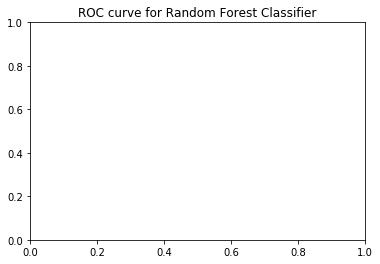

In [31]:

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import random

print('Random Forest')
from sklearn.ensemble import RandomForestClassifier

steps = [('over', SMOTE()), ('model', RandomForestClassifier())]
pipeline = Pipeline(steps=steps)
# Train
#model=MultinomialNB()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, x_train, y_train, scoring='roc_auc', cv=cv,n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 0)
model=model.fit(x_train, y_train)
y_pred=model.predict(x_test)
y_predict_proba = model.predict_proba(x_test)[:, 1]
rf1_predict_proba=y_predict_proba
accuracy=metrics.accuracy_score(y_test,y_pred)
print(accuracy)
print('AUC: {:.2f}%'.format(metrics.roc_auc_score(y_test, y_predict_proba) * 100))
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
TP = cm[0][0]
FN = cm[0][1]
FP = cm[1][0]
TN = cm[1][1]
print(classification_report(y_test, y_pred))
from sklearn.metrics import matthews_corrcoef
print(matthews_corrcoef(y_test, y_pred))
#fpr, tpr, thresholds = roc_curve(y_test, y_predict_proba)
#print('AUC: {:.2f}%'.format(roc_auc_score(y_test, y_predict_proba) * 100))
#mae = metrics.mean_absolute_error(y_test, y_pred)
#mse = metrics.mean_squared_error(y_test, y_pred)
#rmse = np.sqrt(mse) # or mse**(0.5)  
#r2 = metrics.r2_score(y_test,y_pred)

print("Results of sklearn.metrics:")
#print("MAE:",mae)
#print("MSE:", mse)
#print("RMSE:", rmse)
#print("R-Squared:", r2)
#plt.plot([0,1],[0,1],'k--')
#plt.plot(fpr, tpr)
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.0])
#plt.rcParams['font.size'] = 12
plt.title('ROC curve for Random Forest Classifier')



print("classifier accuracy{:.2f}%".format(model.score(x_test,y_test)*100))

score_2=f1_score(actual,predicted,average='binary')
print("F-measure{:.2f}%",score_2)

print("AUC{:.2f}%",mean(scores))


# Evaluate
print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)

In [ ]:
Ambarifinal Imbalanced Bugs.csv

In [ ]:
/